Decision Trees - Bostong Housing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/My Drive/ML/LAB 7/HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396

In [ ]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
df['CHAS']=df['CHAS'].astype(object)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB


In [ ]:
df[['CRIM','ZN','INDUS','AGE','LSTAT']] = df[['CRIM','ZN','INDUS','AGE','LSTAT']].fillna((df[['CRIM','ZN','INDUS','AGE','LSTAT']].mean()))

In [ ]:
df['CHAS']=df['CHAS'].fillna(method='bfill')

In [ ]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432


In [ ]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(X_train, Y_train)

In [ ]:
DT_reg

DecisionTreeRegressor(max_depth=6)

In [ ]:
print(DT_reg.score(X_train,Y_train))
print(DT_reg.score(X_test,Y_test))

0.9473550516257327
0.6812219842111173


In [ ]:
Y_pred=DT_reg.predict(X_test)
Y_pred

array([24.93166667, 24.93166667, 20.77021277, 13.25238095, 20.77021277,
       20.81764706, 20.77021277, 20.81764706, 20.77021277, 20.77021277,
        9.61111111, 17.55      , 13.25238095,  6.58333333, 48.5       ,
       33.65555556, 20.77021277, 34.78888889, 24.93166667, 20.81764706,
       24.93166667, 20.77021277, 20.77021277, 24.93166667, 20.77021277,
       20.77021277, 20.77021277, 16.59583333, 40.75      , 19.8375    ,
       13.25238095, 13.25238095, 20.77021277, 20.77021277, 24.93166667,
       16.59583333,  9.61111111, 24.575     , 16.59583333, 17.55      ,
       20.81764706, 20.77021277, 24.93166667, 13.25238095, 24.93166667,
       24.93166667, 18.95      , 16.59583333, 15.168     , 24.93166667,
       16.59583333, 19.8375    , 20.77021277, 35.2       , 16.59583333,
       23.525     , 20.77021277, 20.77021277, 12.2       , 20.15555556,
       20.81764706, 20.77021277, 33.65555556, 29.78333333, 13.25238095,
       29.78333333, 16.59583333, 20.15555556, 41.3       , 20.77

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


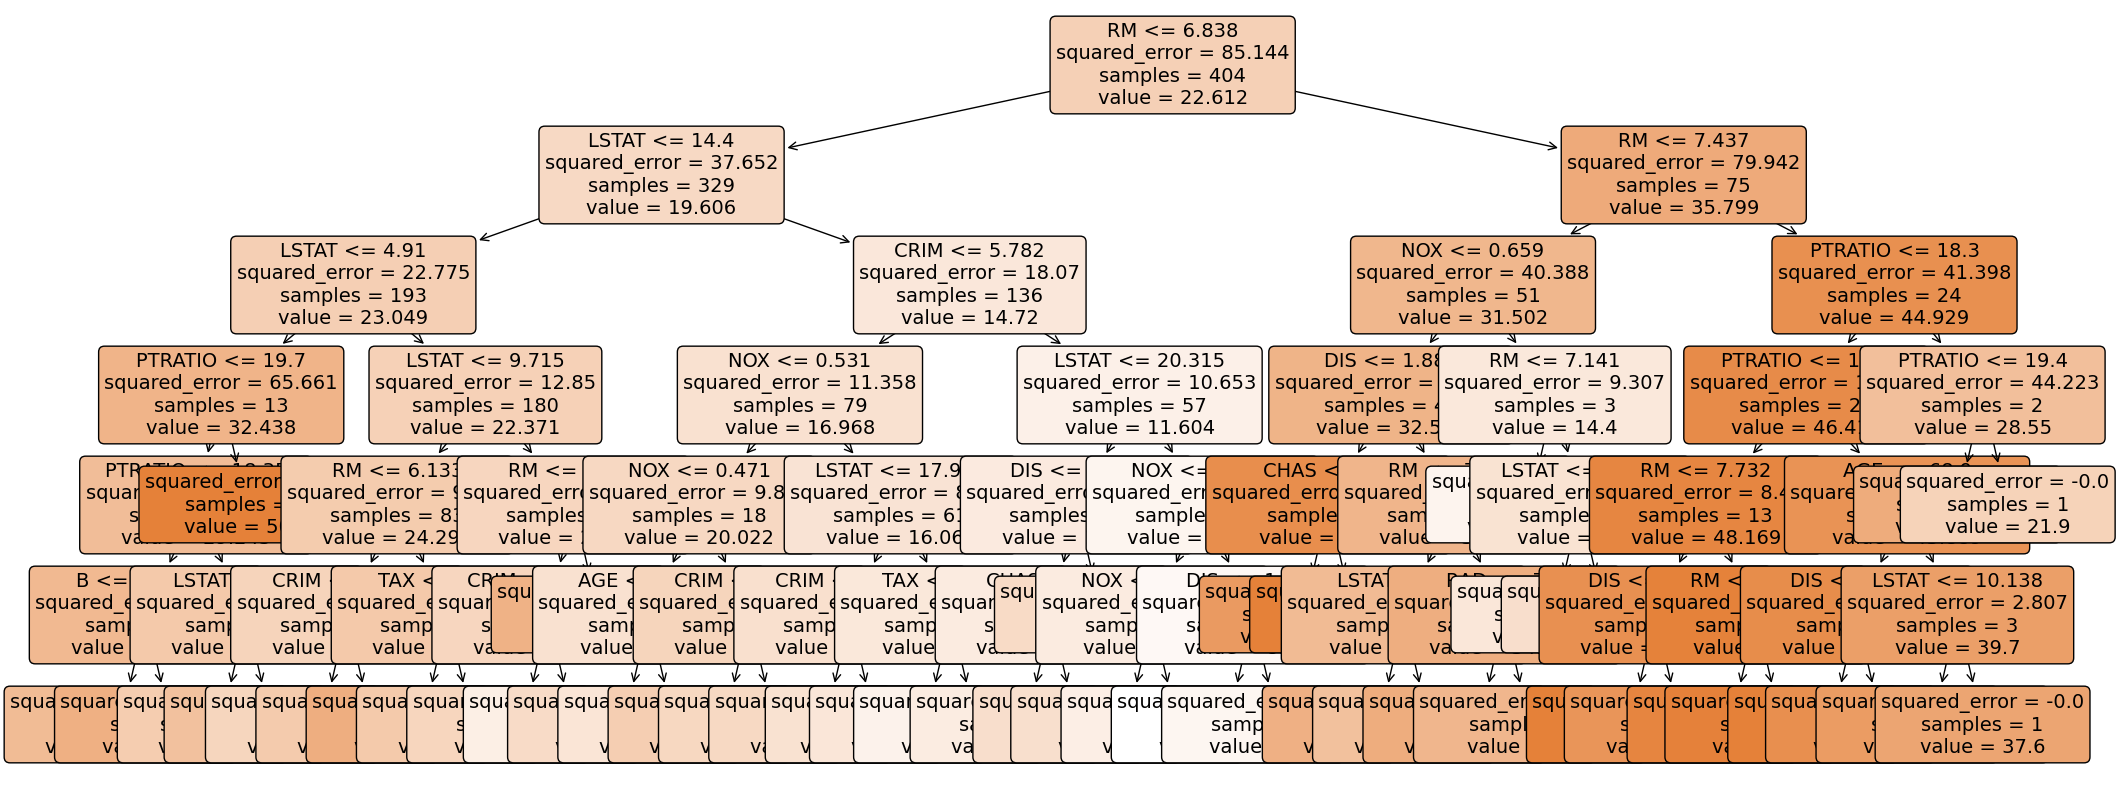

In [ ]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor,
              feature_names=X.columns,
              class_names=Y,
              filled=True,
              rounded=True,
              fontsize=14)